# Multiple Linear Regression for Robot Calibration

You can review the provided demo before the lab.

In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.

The robot data for the lab is taken generously from the TU Dortmund's [TUDOR project](https://rst.etit.tu-dortmund.de/en/forschung/robotik/leichtbau/details-tudor/), TU Dortmund Omni-Elastic Robot.  As part of the project, they have created an excellent public dataset: [MERIt](https://rst.etit.tu-dortmund.de/en/forschung/robotik/leichtbau/details-tudor/#c11560) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="https://rst.etit.tu-dortmund.de/storages/rst-etit/r/Media_Forschung/Robotik/Leichtbau/TUDORBild.png" height="200" width="200">


We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.


## Load and Visualize the Data
First, import the modules we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The full MERIt dataset can be obtained from the [MERIt site](https://rst.etit.tu-dortmund.de/en/forschung/robotik/leichtbau/details-tudor/#c11560).  But, this dataset is large.  Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  We will use the following files:
* exp1.csv for training
* exp2.csvfor test

Below, I have supplied the column headers in the `names` array.  Use the `pd.read_csv` command to load the training data in `exp1.csv`.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO
# df = pd.read_csv(...)
df = pd.read_csv("exp1.csv", names=names, index_col=0)

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [3]:
# TODO
print(df.head(6))


            q1      q2      q3           dq1            dq2           dq3  \
t                                                                           
0.00 -0.000007  2.4958 -1.1345 -7.882100e-21 -4.940656e-321  3.913100e-29   
0.01 -0.000007  2.4958 -1.1345 -2.258200e-21 -4.940656e-321  2.626200e-31   
0.02 -0.000007  2.4958 -1.1345 -6.469800e-22 -4.940656e-321  1.762500e-33   
0.03 -0.000007  2.4958 -1.1345 -1.853600e-22 -4.940656e-321  1.182800e-35   
0.04 -0.000007  2.4958 -1.1345 -5.310600e-23 -4.940656e-321 -5.270900e-03   
0.05 -0.000007  2.4958 -1.1345 -1.521500e-23 -4.940656e-321  3.252600e-04   

            I1       I2       I3   eps21   eps22   eps31    eps32  \
t                                                                   
0.00 -0.081623 -0.40812 -0.30609 -269.25 -113.20  3.5918  1.57860   
0.01 -0.037411 -0.37241 -0.26698 -270.91 -116.05  1.4585 -1.73980   
0.02 -0.066319 -0.40302 -0.31459 -269.25 -112.97  3.5918  0.86753   
0.03 -0.068020 -0.43703 -0.28398 -269.

From the dataframe `df`, extract the time indices into a vector `t` and extract `I2`, the current into the second joint.  Place the current in a vector `y` and plot `y` vs. `t`.   Label the axes with the units.

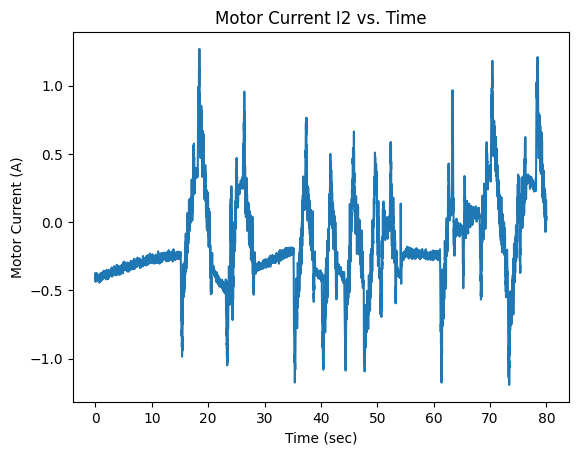

In [4]:
# TODO
# y = ...
# t = ...
# plt.plot(...)
y = df['I2']
t = df.index

#Plot
plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Motor Current (A)')
plt.title('Motor Current I2 vs. Time')
plt.show()

Use all the samples from the experiment 1 dataset to create the training data:
* `ytrain`:  A vector of all the samples from the `I2` column
* `Xtrain`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [5]:
# TODO
# ytrain = ...
# Xtrain = ...
ytrain = df['I2']
Xtrain = df[['q2', 'dq2', 'eps21', 'eps22', 'eps31', 'eps32', 'ddq2']]

## Fit a Linear Model
Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [7]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
# TODO
# regr = ...
regr = LinearRegression()


Train the model on the training data.

In [8]:
# TODO
#Fitting the model
regr.fit(Xtrain, ytrain)

LinearRegression()

Using the trained model, compute, `ytrain_pred`, the predicted current.  Plot `ytrain_pred` vs. time `t`.  On the same plot, plot the actual current `ytrain` vs. time `t`.  Create a legend for the plot.

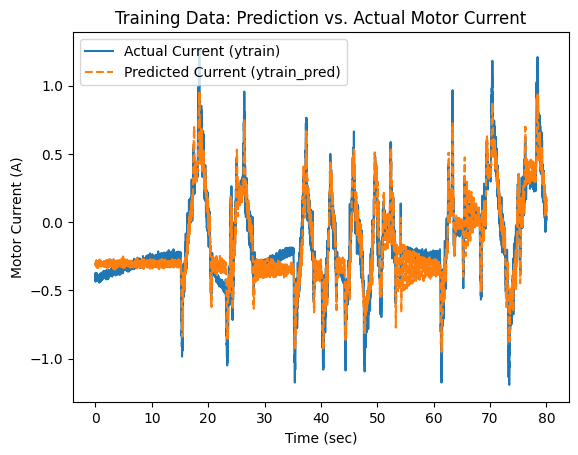

In [9]:
# TODO
# ytrain_pred = ...
# plt.plot(...)
ytrain_pred = regr.predict(Xtrain)

#Plot predictions vs. actual data
plt.plot(t, ytrain, label = 'Actual Current (ytrain)')
plt.plot(t, ytrain_pred, label = 'Predicted Current (ytrain_pred)', linestyle = '--')
plt.xlabel('Time (sec)')
plt.ylabel('Motor Current (A)')
plt.legend()
plt.title('Training Data: Prediction vs. Actual Motor Current')
plt.show()

Measure the normalized RSS given by `RSS / (n s^2_y).

In [10]:
# TODO
# RSS_train = ...
RSS_train = np.sum((ytrain - ytrain_pred) ** 2)
n = len(ytrain)
s_y2 = np.var(ytrain, ddof=1)
normalized_RSS_train = RSS_train / (n * s_y2)
print(f"Normalized RSS (Training): {normalized_RSS_train:.4f}")

Normalized RSS (Training): 0.0958


## Measure the Fit on an Indepdent Dataset

Up to now, we have only tested the model on the same data on which it was trained.  In general, we need to test model on independent data not used in the training.  For this purpose, load the data in `exp2.csv`.  Compute the regression predicted values on this data and plot the predicted and actual values over time.

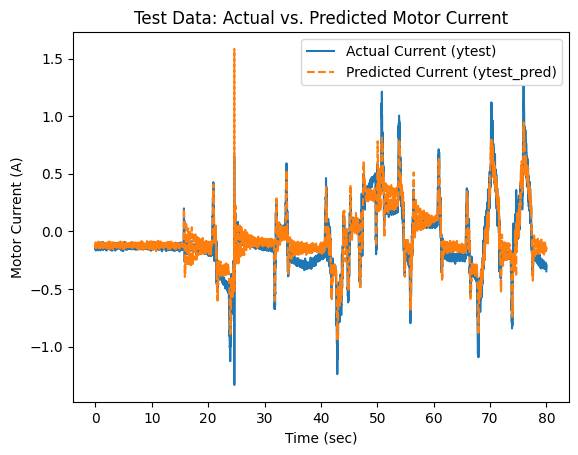

In [11]:
# TODO
#Load test data
df_test = pd.read_csv("exp2.csv", names=names, index_col=0)

# Extract test features and labels
Xtest = df_test[['q2', 'dq2', 'eps21', 'eps22', 'eps31', 'eps32', 'ddq2']]
ytest = df_test['I2']

# Predict on test data
ytest_pred = regr.predict(Xtest)

# Plot predictions vs. actual data
t_test = df_test.index
plt.plot(t_test, ytest, label='Actual Current (ytest)')
plt.plot(t_test, ytest_pred, label='Predicted Current (ytest_pred)', linestyle='--')
plt.xlabel('Time (sec)')
plt.ylabel('Motor Current (A)')
plt.legend()
plt.title('Test Data: Actual vs. Predicted Motor Current')
plt.show()

Measure the normalized RSS on the test data.

In [12]:
# TODO
# RSS_test = ...
RSS_test = np.sum((ytest - ytest_pred) ** 2)
n_test = len(ytest)
s_ytest2 = np.var(ytest, ddof=1)
normalized_RSS_test = RSS_test / (n_test * s_ytest2)


print(f"Normalized RSS (Test): {normalized_RSS_test:.4f}")

Normalized RSS (Test): 0.1268
